In [55]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,  kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns
import os

import joblib

import numpy as np

In [56]:
df = pd.read_csv("final_data/filterAdni_data.csv")
df

,AGE,PTEDUCAT,FDG,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,...,FSVERSION,IMAGEUID,Hippocampus,mPACCdigit,mPACCtrailsB,FAQTOTAL,ID_faq,ID_neurobat,ADNI_MEM,DX_bl
0,74.3,16,1.336150,0.0,10.67,18.67,5.0,28.0,44.0,54.5455,...,2,3.547500e+04,8336.000000,-4.310280,-4.114430,0.0,4.0,30.0,0.405,0
1,81.3,18,1.108600,4.5,22.00,31.00,8.0,20.0,22.0,100.0000,...,2,3.223700e+04,5319.000000,-16.244900,-15.829900,10.0,8.0,36.0,-1.021,4
2,67.5,10,1.198979,1.0,14.33,21.33,6.0,27.0,37.0,36.3636,...,2,6.463100e+04,6869.000000,-8.421500,-9.449350,0.0,30.0,140.0,-0.009,2
3,73.7,16,1.259560,0.0,8.67,14.67,4.0,29.0,37.0,44.4444,...,2,3.224600e+04,7075.000000,-1.888680,-1.565830,0.0,6.0,32.0,0.743,0
4,80.4,13,1.198979,0.5,18.67,25.67,7.0,25.0,30.0,83.3333,...,2,3.302500e+04,5348.000000,-10.141700,-10.910900,0.0,44.0,182.0,-0.219,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,0.0,0.67,0.67,0.0,30.0,59.0,0.0000,...,1,1.633742e+06,7717.300000,5.427020,5.167270,3.0,170293.0,170226.0,2.978,3
2415,61.4,12,1.198979,3.5,20.33,31.33,9.0,28.0,22.0,85.7143,...,3,4.356456e+05,6929.112247,-10.780300,-11.308700,15.0,170102.0,170105.0,-0.844,2
2416,64.6,12,1.198979,0.5,16.33,23.33,7.0,27.0,31.0,75.0000,...,3,4.356456e+05,6929.112247,-9.659400,-7.517550,0.0,171173.0,171669.0,-0.232,2
2417,68.9,18,1.198979,0.5,5.00,7.00,2.0,30.0,45.0,38.4615,...,3,4.356456e+05,6929.112247,2.742450,2.540260,0.0,173878.0,173872.0,1.392,1


In [57]:
X = df.drop(columns=['DX_bl'])
y = df['DX_bl']

In [58]:
display(X), display(y)

,AGE,PTEDUCAT,FDG,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,...,FLDSTRENG,FSVERSION,IMAGEUID,Hippocampus,mPACCdigit,mPACCtrailsB,FAQTOTAL,ID_faq,ID_neurobat,ADNI_MEM
0,74.3,16,1.336150,0.0,10.67,18.67,5.0,28.0,44.0,54.5455,...,0,2,3.547500e+04,8336.000000,-4.310280,-4.114430,0.0,4.0,30.0,0.405
1,81.3,18,1.108600,4.5,22.00,31.00,8.0,20.0,22.0,100.0000,...,0,2,3.223700e+04,5319.000000,-16.244900,-15.829900,10.0,8.0,36.0,-1.021
2,67.5,10,1.198979,1.0,14.33,21.33,6.0,27.0,37.0,36.3636,...,0,2,6.463100e+04,6869.000000,-8.421500,-9.449350,0.0,30.0,140.0,-0.009
3,73.7,16,1.259560,0.0,8.67,14.67,4.0,29.0,37.0,44.4444,...,0,2,3.224600e+04,7075.000000,-1.888680,-1.565830,0.0,6.0,32.0,0.743
4,80.4,13,1.198979,0.5,18.67,25.67,7.0,25.0,30.0,83.3333,...,0,2,3.302500e+04,5348.000000,-10.141700,-10.910900,0.0,44.0,182.0,-0.219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,0.0,0.67,0.67,0.0,30.0,59.0,0.0000,...,2,1,1.633742e+06,7717.300000,5.427020,5.167270,3.0,170293.0,170226.0,2.978
2415,61.4,12,1.198979,3.5,20.33,31.33,9.0,28.0,22.0,85.7143,...,2,3,4.356456e+05,6929.112247,-10.780300,-11.308700,15.0,170102.0,170105.0,-0.844
2416,64.6,12,1.198979,0.5,16.33,23.33,7.0,27.0,31.0,75.0000,...,2,3,4.356456e+05,6929.112247,-9.659400,-7.517550,0.0,171173.0,171669.0,-0.232
2417,68.9,18,1.198979,0.5,5.00,7.00,2.0,30.0,45.0,38.4615,...,2,3,4.356456e+05,6929.112247,2.742450,2.540260,0.0,173878.0,173872.0,1.392


0       0
1       4
2       2
3       0
4       2
       ..
2414    3
2415    2
2416    2
2417    1
2418    2
Name: DX_bl, Length: 2419, dtype: int64

(None, None)

In [59]:
print('''
"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer''')


"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1935, 35) (1935,)
(484, 35) (484,)


In [61]:
val_indices = []
validations = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

for idx, (x_val, y_val) in enumerate(zip(X_train.values, y_train)):
    if validations[y_val] < 3:
        validations[y_val] += 1
        val_indices.append(idx)

X_val = X_train.iloc[val_indices].copy()
y_val = y_train.iloc[val_indices].copy()

X_train = X_train.drop(index=X_train.index[val_indices])
y_train = y_train.drop(index=y_train.index[val_indices])

df_val = X_val.copy()
df_val['DX_bl'] = y_val

df_val

,AGE,PTEDUCAT,FDG,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,...,FSVERSION,IMAGEUID,Hippocampus,mPACCdigit,mPACCtrailsB,FAQTOTAL,ID_faq,ID_neurobat,ADNI_MEM,DX_bl
1669,73.7,14,1.264620,2.0,8.00,13.00,4.0,30.0,31.0,50.0000,...,0,280556.0,7616.000000,-1.541440,-1.372000,3.704969,33756.095326,34038.621622,0.365682,1
1566,70.3,12,1.293390,0.0,5.33,7.33,2.0,25.0,44.0,27.2727,...,2,55943.0,7655.000000,-3.776110,-2.944830,0.000000,1146.000000,2794.000000,1.021000,0
544,76.6,18,1.178970,1.5,14.67,23.67,9.0,25.0,29.0,100.0000,...,2,66141.0,6098.000000,-9.998560,-12.438500,7.000000,2030.000000,4294.000000,-0.653000,2
1374,82.5,14,1.275480,1.0,6.00,8.00,1.0,28.0,41.0,22.2222,...,0,223220.0,6254.000000,-1.641400,-4.022350,3.000000,44.000000,174.000000,1.172000,1
1640,68.6,17,1.150180,2.0,12.00,18.00,6.0,26.0,37.0,80.0000,...,0,255405.0,6755.000000,-7.281840,-6.026140,3.704969,33756.095326,34038.621622,0.365682,1
1873,86.8,16,1.133460,1.0,3.33,5.33,2.0,29.0,40.0,27.2727,...,1,958678.0,5669.000000,-2.019810,-2.932230,1.000000,36167.000000,36179.000000,1.085000,2
874,69.2,18,1.179760,3.5,22.00,33.00,10.0,21.0,26.0,100.0000,...,0,327035.0,5001.000000,-19.669400,-15.240700,3.704969,33756.095326,34038.621622,0.365682,4
999,81.8,15,1.165720,0.5,9.00,10.00,1.0,29.0,46.0,45.4545,...,0,305440.0,6929.112247,-3.276430,-1.597880,3.704969,33756.095326,34038.621622,0.365682,2
937,83.2,19,1.098800,4.5,23.00,33.00,9.0,26.0,17.0,75.0000,...,0,321466.0,6623.000000,-13.507800,-13.435300,3.704969,33756.095326,34038.621622,0.365682,4
366,69.4,12,1.050340,3.5,23.00,34.00,10.0,25.0,21.0,100.0000,...,2,38652.0,5478.000000,-13.692300,-14.865000,12.000000,1056.000000,2626.000000,-1.200000,4


In [62]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1920, 35) (1920,)
(15, 35) (15,)


In [ ]:
def get_data_validation():
    reversed_encoder = joblib.load('transformers/label_encoders.pkl')

    for col, encoder in reversed_encoder.items():
        if col in df_val.columns:
            df_val[col] = encoder.inverse_transform(df_val[col])
        else:
            print(f"Column {col} not found in DataFrame.")
        
    dx_bl = {
        0: "CN",
        1: "EMCI",
        2: "LMCI",
        3: "SMC",
        4: "AD"
    }
    df_val['DX_bl'] = df_val['DX_bl'].map(dx_bl)   
            
    df_val.to_csv('final_data/data_validation.csv', index=False)
#get_data_validation()

Column PTGENDER not found in DataFrame.
Column PTETHCAT not found in DataFrame.
Column PTRACCAT not found in DataFrame.
Column PTMARRY not found in DataFrame.
Column ABETA not found in DataFrame.
Column TAU not found in DataFrame.
Column PTAU not found in DataFrame.


In [64]:
df_val.to_csv("final_data/data_validation.csv", index=False)

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

#Save scalar format
joblib.dump(scaler, "transformers/scaler.pkl")

(1920, 35) (484, 35)


['transformers/scaler.pkl']

## Train models

#### Neural Network

In [66]:
#Neural Network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(35, 128)   # Input layer
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 128)   # Hidden layer
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)   # Hidden layer
        self.dropout3 = nn.Dropout(0.2)
        self.out = nn.Linear(64, 5)# Output layer

    def forward(self, x):
        x = F.normalize(x)              # Optional: normalize inputs
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        return self.out(x)

Epoch 1, Train Loss: 1.6135, Val Loss: 1.6132


Epoch 50, Train Loss: 0.8910, Val Loss: 0.8434
Epoch 100, Train Loss: 0.5535, Val Loss: 0.5599
Epoch 150, Train Loss: 0.4675, Val Loss: 0.5183
Epoch 182, Train Loss: 0.4191, Val Loss: 0.5091

Early stopping at epoch 182
Neural Network - Accuracy: 0.7727

Neural Network - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       101
           1       0.80      0.82      0.81        90
           2       0.88      0.83      0.85       151
           3       0.52      0.52      0.52        69
           4       0.86      0.90      0.88        73

    accuracy                           0.77       484
   macro avg       0.75      0.76      0.76       484
weighted avg       0.77      0.77      0.77       484



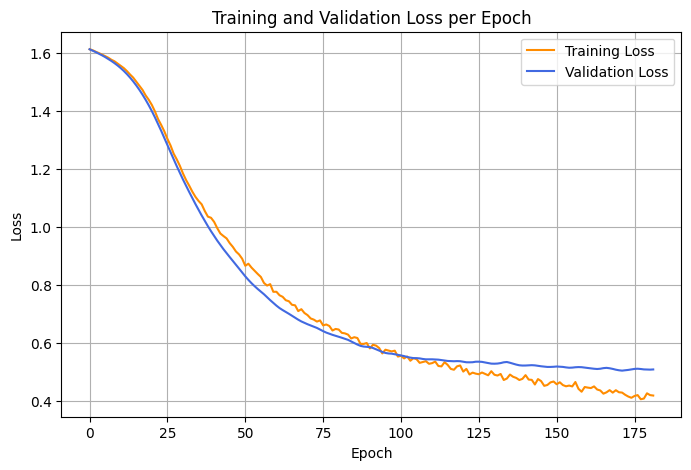

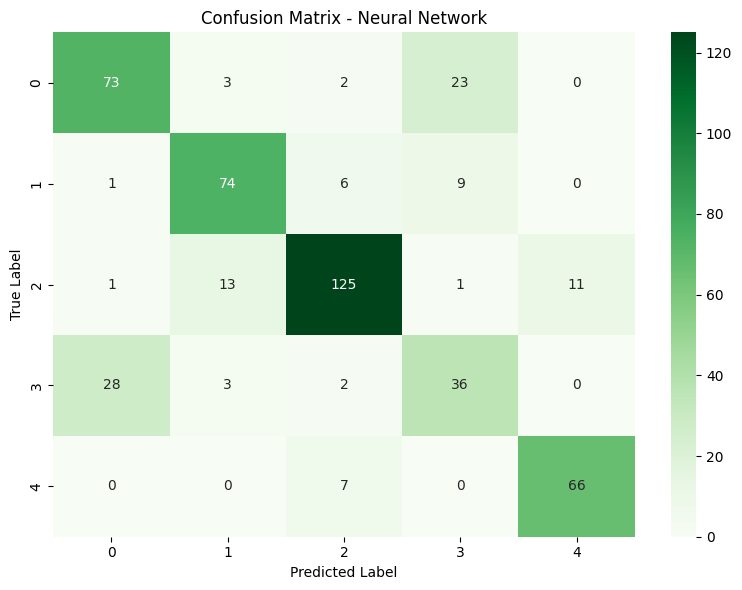

In [67]:
# Initialize model
net = Net()

# Convert data to tensors
x_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
x_val_tensor = torch.from_numpy(X_test_scaled).float()
y_val_tensor = torch.from_numpy(y_test.values).long()

# Optimizer and loss
optimizer = torch.optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

train_losses = []
val_losses = []

# Early stopping
best_val_loss = float('inf')
patience = 10
epochs_no_improve = 0
best_model_state = None

# Training loop
max_epochs = 1000
for epoch in range(1, max_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    net.eval()
    with torch.no_grad():
        val_outputs = net(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())
    if epoch % 50 == 0 or epoch == 1:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = net.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
        print(f"\nEarly stopping at epoch {epoch}")
        break
    
# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss', color='darkorange')
plt.plot(val_losses, label='Validation Loss', color='royalblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.grid(True)
plt.legend()

# Load best model
if best_model_state is not None:
    net.load_state_dict(best_model_state)

# Evaluation
net.eval()
with torch.no_grad():
    train_preds = net(x_train_tensor).argmax(dim=1).numpy()
    val_preds = net(x_val_tensor).argmax(dim=1).numpy()
    train_labels = y_train_tensor.numpy()
    val_labels = y_val_tensor.numpy()
    


# Metrics
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Neural Network - Accuracy: {val_accuracy:.4f}")
print("\nNeural Network - Classification Report:")
print(classification_report(val_labels, val_preds))

# Confusion Matrix
cm_nn = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Neural Network')
plt.tight_layout()
plt.show()

# Save model
torch.save(net.state_dict(), 'models/neural_network_model.pth')

#### Random Forest

Random Forest - Accuracy: 0.8719

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       101
           1       0.85      0.90      0.88        90
           2       0.88      0.91      0.90       151
           3       0.79      0.75      0.77        69
           4       0.90      0.88      0.89        73

    accuracy                           0.87       484
   macro avg       0.87      0.86      0.86       484
weighted avg       0.87      0.87      0.87       484



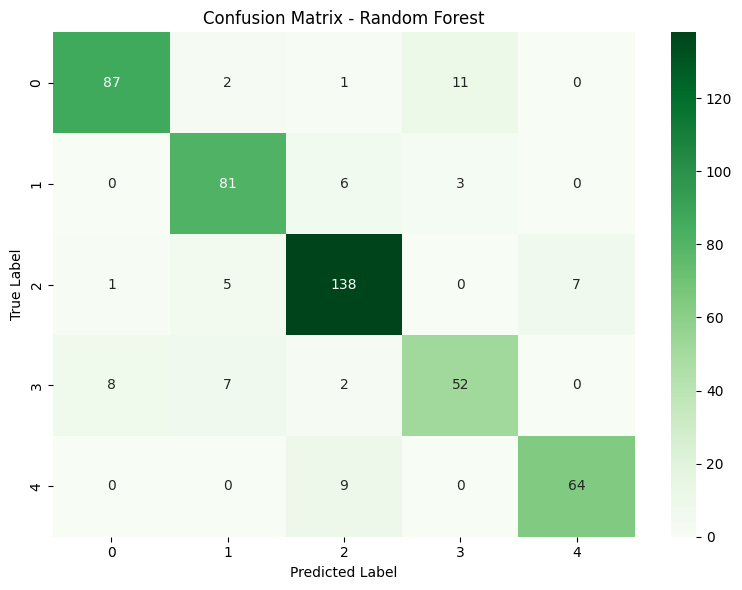

['models/random_forest_model.pkl']

In [68]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf_model, 'models/random_forest_model.pkl')

#### Gradient Boosting

Gradient Boosting - Accuracy: 0.8946

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       101
           1       0.89      0.93      0.91        90
           2       0.93      0.93      0.93       151
           3       0.78      0.83      0.80        69
           4       0.92      0.90      0.91        73

    accuracy                           0.89       484
   macro avg       0.89      0.89      0.89       484
weighted avg       0.90      0.89      0.89       484



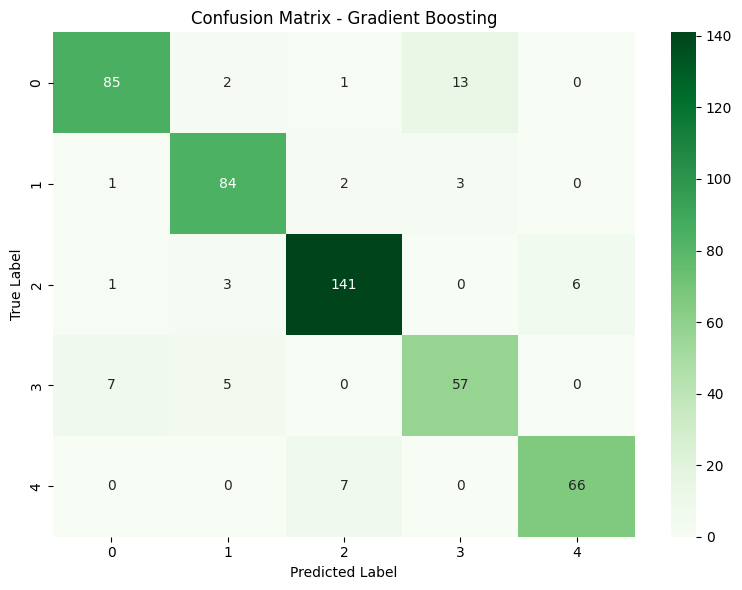

['models/gradient_boosting_model.pkl']

In [69]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.17)
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb:.4f}")
print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(gb_model, 'models/gradient_boosting_model.pkl')

Stacking Ensemble - Accuracy: 0.8946

Stacking Ensemble - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       101
           1       0.89      0.94      0.92        90
           2       0.93      0.93      0.93       151
           3       0.80      0.81      0.81        69
           4       0.90      0.89      0.90        73

    accuracy                           0.89       484
   macro avg       0.89      0.89      0.89       484
weighted avg       0.89      0.89      0.89       484



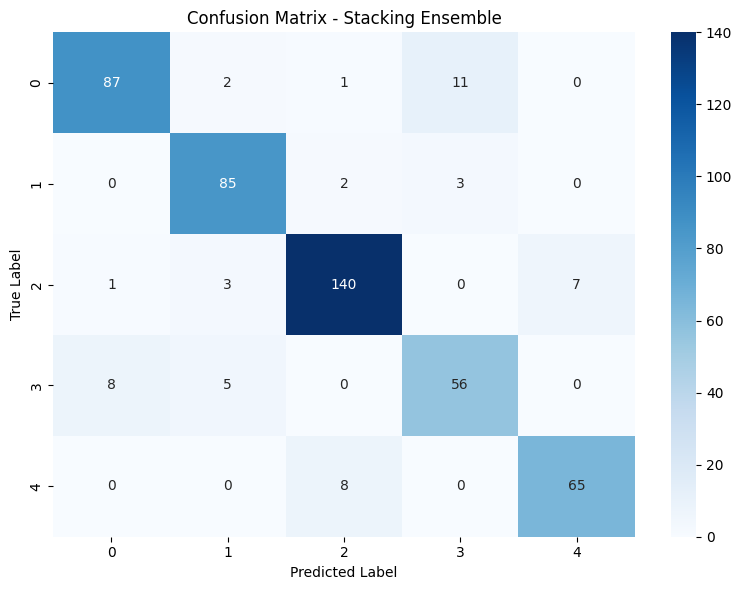

In [70]:

# Load scikit-learn models
rf_model = joblib.load('models/random_forest_model.pkl')
gb_model = joblib.load('models/gradient_boosting_model.pkl')

# Load PyTorch model
net = Net()
net.load_state_dict(torch.load('models/neural_network_model.pth'))
net.eval()

# Convert test data to tensors
x_val_tensor = torch.from_numpy(X_test_scaled).float()

# Generate prediction probabilities
rf_probs = rf_model.predict_proba(X_test_scaled)
gb_probs = gb_model.predict_proba(X_test_scaled)

with torch.no_grad():
    nn_logits = net(x_val_tensor)
    nn_probs = F.softmax(nn_logits, dim=1).numpy()

# Stack predictions as features for meta-model
stacked_features = np.hstack((rf_probs, gb_probs, nn_probs))

# Train meta-classifier
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(stacked_features, y_test)

#Save model 
joblib.dump(meta_model, "metamodelo.pkl")

# Predict final output
y_pred_ensemble = meta_model.predict(stacked_features)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Stacking Ensemble - Accuracy: {accuracy:.4f}")
print("\nStacking Ensemble - Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Stacking Ensemble')
plt.tight_layout()
plt.show()